In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import scipy.stats as stats
from collections import Counter
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import math

%matplotlib inline
warnings.filterwarnings(action='once')

/home/Kenneth/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Read train and test data

In [2]:
df_train = pd.read_csv('Kaggle/Housing_Prices/train.csv')

In [3]:
df_test = pd.read_csv('Kaggle/Housing_Prices/test.csv')

In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

In [5]:
# Train data imported successfully?

display_all(df_train)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

In [6]:
# Test data imported successfully?

display_all(df_test)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160       RM         21.0     1680   Pave   NaN      Reg   
12    1473         160       RM         21.0     1680   Pave   NaN      Reg   
13    1474         160       RL         24.0     2280   Pave   NaN      Reg   
14    1475         120       RL         24.0     2280   Pave   NaN      Reg   
15    1476          60       RL        102.0    12858   Pave   NaN      IR1   
16    1477          20       RL         94.0    12883   Pave   NaN      IR1   
17    1478          20       RL         90.0    11520   Pave   NaN      Reg   
18    1479          20       RL         79.0    14122   Pave   NaN      IR1   
19    1480          20       RL        110.0    14300   Pave   NaN      Reg   
20    1481          60       RL        105.0    13650   Pave   NaN      Reg   
21    1482         120       RL         41.0     7132   Pave   NaN      IR1   
22    1483          20       RL        100.0    18494   Pave   NaN      IR1   
23    1484         120       RL         43.0     3203   Pave   NaN      Reg   
24    1485          80       RL         67.0    13300   Pave   NaN      IR1   
25    1486          60       RL         63.0     8577   Pave   NaN      IR1   
26    1487          60       RL         60.0    17433   Pave   NaN      IR2   
27    1488          20       RL         73.0     8987   Pave   NaN      Reg   
28    1489          20       FV         92.0     9215   Pave   NaN      Reg   
29    1490          20       FV         84.0    10440   Pave   NaN      Reg   
30    1491          60       RL         70.0    11920   Pave   NaN      Reg   
31    1492          30       RH         70.0     9800   Pave   NaN      Reg   
32    1493          20       RL         39.0    15410   Pave   NaN      IR1   
33    1494          60       RL         85.0    13143   Pave   NaN      IR1   
34    1495          60       RL         88.0    11134   Pave   NaN      Reg   
35    1496         120       FV         25.0     4835   Pave   NaN      IR1   
36    1497         160       FV         39.0     3515   Pave  Pave      Reg   
37    1498         160       FV         30.0     3215   Pave  Pave      Reg   
38    1499         160       FV         24.0     2544   Pave  Pave      Reg   
39    1500         160       FV         24.0     2544   Pave  Pave      Reg   
40    1501         160       FV          NaN     2980   Pave   NaN      Reg   
41    1502         160       FV          NaN     2403   Pave   NaN      IR1   
42    1503          20       FV         57.0    12853   Pave  Pave      IR1   
43    1504          60       FV         68.0     7379   Pave   NaN      IR1   
44    1505          20       FV         80.0     8000   Pave   NaN      Reg   
45    1506          20       RL          NaN    10456   Pave   NaN      IR1   
46    1507          60       RL         80.0    10791   Pave   NaN      Reg   
47    1508          50       RL          NaN    18837   Pave   NaN      IR1   
48    1509          60       RL         80.0     9600   Pave   NaN      Reg   
49    1510          20       RL         80.0     9600   Pa

#### EDA

In [7]:
# Percentage missing values

display_all(df_train.isnull().sum().sort_index()/len(df_train))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

/home/Kenneth/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):


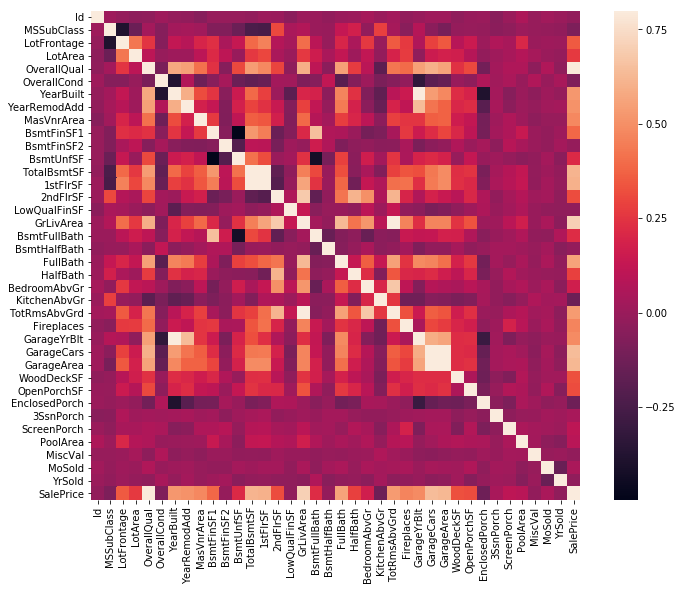

In [8]:
# Correlation matrix

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

# Conclusion: 
# (i) Strong positive relationship between 1stFlrSF and TotalBsmtSF; GarageArea and GarageCars
# (ii) strong relationship between SalePrice and OverallQual, GrLivArea, YearBuilt, GarageArea, TotalBsmtSF

#### Analyze SalePrice and OverallQual, GrLivArea, YearBuilt, GarageArea, TotalBsmtSF further

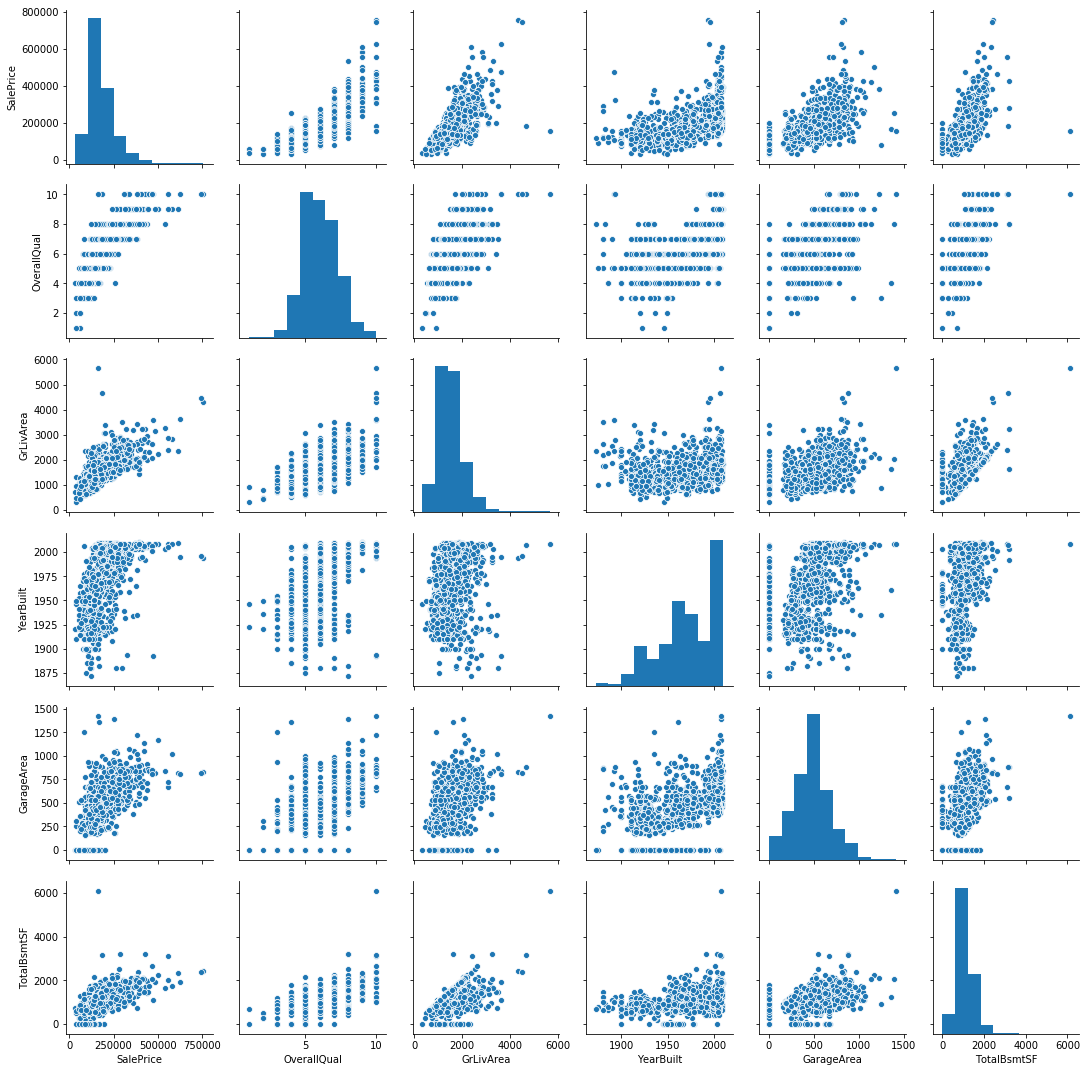

In [9]:
# Pairplot

df_train_impt = df_train[['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF']]
sns.pairplot(df_train_impt)

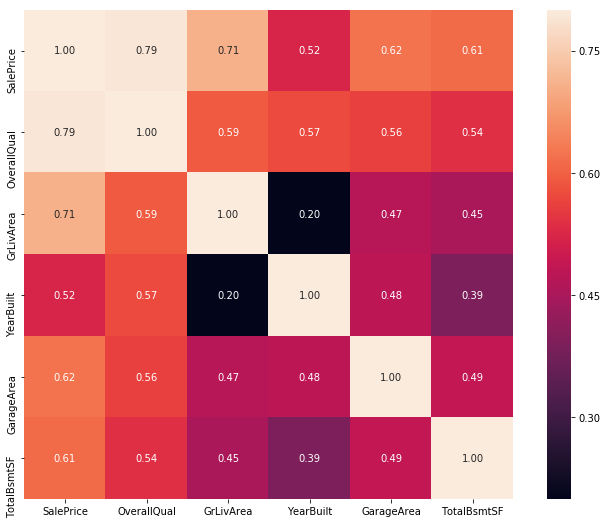

In [10]:
# Correlation matrix

corrmat = df_train_impt.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, fmt='.2f', vmax=.8, square=True)

#### Check skewness for dependent variable

In [11]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


/home/Kenneth/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


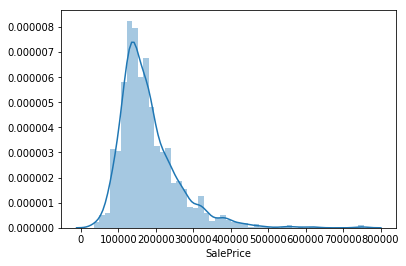

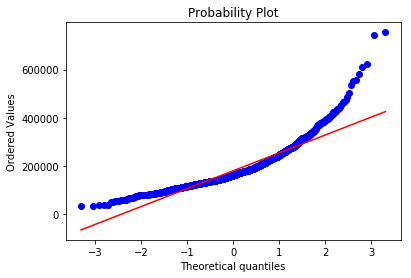

In [12]:
# SalePrice exhibits skewness

print("Skewness: %f" % df_train['SalePrice'].skew()) #how tilted the data, postive means skewed to the right. Normal dist = 0
print("Kurtosis: %f" % df_train['SalePrice'].kurt()) #how often data is at the tails, If <3 then lesser amount of data exist at the tails compared to Normal dist.

sns.distplot(df_train['SalePrice'])

plt.figure()
qq = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

/home/Kenneth/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


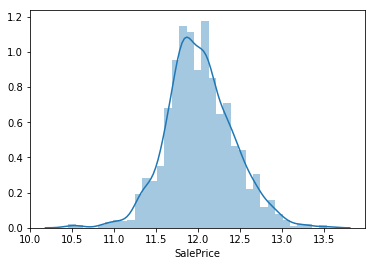

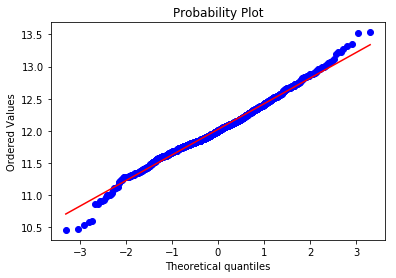

In [13]:
# Use log(x+1) to transform SalePrice

df_train['SalePrice'] = np.log1p(df_train['SalePrice'])


sns.distplot(df_train['SalePrice'])

plt.figure()
qq = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

#### Independent Variables Separation // Combine train and test df

In [14]:
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

In [15]:
y = df_train['SalePrice']
df_train.drop('SalePrice', axis=1, inplace=True)

In [16]:
# Combine train and test sets so that we will only need to apply transformations to one data set

df_combined = pd.concat([df_train, df_test]).reset_index()
df_combined.drop(['index'], axis=1, inplace=True)

#### Handling missing values

In [17]:
# for CAT columns whereby documentation says NA means the property do not have them

nones = ['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu', 'GarageType','GarageFinish',
        'GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'MasVnrType']

for none in nones:
    df_combined[none].fillna('None', inplace=True)

In [18]:
# for NUM columns where we assume missing values = zero

zeros = ['GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         'BsmtFullBath','BsmtHalfBath','MasVnrArea']

for zero in zeros:
    df_combined[zero].fillna(0, inplace = True)

In [19]:
# Replace NA of LotFrontage with median LotFrontage of similar rows according to LotArea and Neighborhood

#df_combined['old_lotfrontage'] = df_combined['LotFrontage']

df_combined['LotFrontage'] = df_combined.groupby(['LotArea','Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_combined['LotFrontage'] = df_combined.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [20]:
# for CAT columns which are not extremely imbalanced, replace missing values with most frequently ocurred values

freq = ['MSZoning','Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual','Functional']

for fr in freq:
    df_combined[fr].fillna(df_combined[fr].mode()[0], inplace=True)

In [21]:
print('Remaining missing values:', df_combined.isnull().sum().sum())

display_all(df_combined.isnull().sum().sort_index()/len(df_combined))

Remaining missing values: 2


1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.000000
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.000000
BsmtFinType2     0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.000000
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000000
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.000000
FireplaceQu      0.000000
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.000000
GarageFinish     0.000000
GarageQual       0.000000
GarageType       0.000000
GarageYrBlt      0.000000
GrLivArea   

#### Drop highly imbalanced features

In [22]:
Counter(df_train.Utilities)

Counter({'AllPub': 1459, 'NoSeWa': 1})

In [23]:
df_combined.drop('Utilities', axis=1, inplace=True)

#### Transformation & Encoding

In [24]:
# Nominal variables
# get_dummies can convert data to 0 and 1 only if the data type is string. Among the many nominal features,
# MSSubClass, MoSold, and YrSold are integer type so we need to convert them to string type.

df_combined['MoSold'] = df_combined.astype(str)
df_combined['YrSold'] = df_combined.astype(str)
df_combined['MSSubClass'] = df_combined.astype(str)

nominals = ['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
           'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType','SaleCondition','MoSold','YrSold']

In [25]:
# Ordinal variables

from sklearn.preprocessing import LabelEncoder

ordinals = ['LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
           'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual',
            'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

for ordinal in ordinals:
    le = LabelEncoder()
    le.fit(df_combined[ordinal])
    df_combined[ordinal] = le.transform(df_combined[ordinal])

#### New Feature

In [26]:
df_combined['TotalArea'] = df_combined['GrLivArea'] + df_combined['TotalBsmtSF']

#### Skewed Numeric Features

In [27]:
# Assign numeric features by excluding non numeric features
numeric = df_combined.dtypes[df_combined.dtypes != 'object'].index

# Display the skewness of each column and sort the values in descending order 
skewness = df_combined[numeric].apply(lambda x: x.skew()).sort_values(ascending=False)

# Create a dataframe and show 5 most skewed features 
sk_df = pd.DataFrame(skewness,columns=['skewness'])
sk_df['skw'] = abs(sk_df)
sk_df.sort_values('skw',ascending=False).drop('skw',axis=1).head()


skewness
MiscVal       21.958480
PoolQC       -20.734650
PoolArea      16.907017
LotArea       12.829025
LowQualFinSF  12.094977

In [28]:
# As a general rule of thumb, skewness with an absolute value less than 0.5 is considered as a acceptable range of skewness for normal distribution of data
skw_feature = skewness[abs(skewness) > 0.5].index

# Transform skewed features to normal distribution by taking log(1 + input)
df_combined[skw_feature] = np.log1p(df_combined[skw_feature])

#### Dummy variable

In [29]:
df_combined = pd.get_dummies(df_combined)
print(df_combined.shape)

(2919, 266)


#### Train/ Test split

In [30]:
# Split the combined dataset into two: train and test

X_train = df_combined[:df_train.shape[0]]
X_test = df_combined[df_train.shape[0]:]

In [31]:
print("training shape:{}, test shape:{}".format(X_train.shape,X_test.shape))

training shape:(1460, 266), test shape:(1459, 266)


#### Modelling

Multi-regression

In [32]:
#model = linear_model.LinearRegression()
#model.fit(X, y)
#print('R2 is: %f \n' % model.score(X, y))
#print('coefficients are:')
#print(model.coef_)

#print('\nintercept is:')
#print(model.intercept_)

model = sm.OLS(y, X_train).fit()
print(model.summary())
prediction_Reg_log = model.predict(X_test)
prediction_Reg = np.expm1(prediction_Reg_log)






                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     97.55
Date:                Sat, 05 Jan 2019   Prob (F-statistic):               0.00
Time:                        06:28:13   Log-Likelihood:                 1346.2
No. Observations:                1460   AIC:                            -2274.
Df Residuals:                    1251   BIC:                            -1170.
Df Model:                         208                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.00

/home/Kenneth/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/Kenneth/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/Kenneth/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/Kenneth/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [33]:
submission = pd.DataFrame()
df_test1 = pd.read_csv('Kaggle/Housing_Prices/test.csv')

submission['SalePrice'] = prediction_Reg
submission.reset_index
submission['Id'] = df_test1['Id']



submission.to_csv('Kaggle/Housing_Prices/submission_Reg.csv', index=False)

Feature scaling // Random Forest

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns=df_combined.columns)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = df_combined.columns)

In [35]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 500
n_trn = len(X_train)-n_valid
X_train1, X_valid = split_vals(X_train, n_trn)
y_train1, y_valid = split_vals(y, n_trn)

In [36]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train1), y_train1), rmse(m.predict(X_valid), y_valid),
           m.score(X_train1, y_train1), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [37]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y)
m.score(X_train, y)
print_score(m)

[0.05233325296704631, 0.051605403614213397, 0.9832950559707031, 0.9823143629363534, 0.8738940775307049]


In [38]:
prediction_RF_log = m.predict(X_test)
prediction_RF = np.expm1(prediction_RF_log)

submission_RF = pd.DataFrame()
df_test1 = pd.read_csv('Kaggle/Housing_Prices/test.csv')

submission_RF['SalePrice'] = prediction_RF
submission.reset_index
submission['Id'] = df_test1['Id']

submission_RF.to_csv('Kaggle/Housing_Prices/submission_RF.csv', index=False)

#### Ensemble - Averaging

In [39]:
prediction_avg = (prediction_Reg + prediction_RF)/2

submission_avg = pd.DataFrame()
df_test1 = pd.read_csv('Kaggle/Housing_Prices/test.csv')

submission_avg['SalePrice'] = prediction_avg
submission.reset_index
submission_avg['Id'] = df_test1['Id']

submission_avg.to_csv('Kaggle/Housing_Prices/submission_avg.csv', index=False)

#### Other code

In [ ]:
#Create a df containing only important variables for furthere analysis. These important variables were chosen based on the RandomForest - Feature Importance exercise

df_raw_impt = df_raw[['SalePrice','OverallQual','GrLivArea','YearBuilt','TotalBsmtSF','GarageArea']]

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='SalePrice', x='GrLivArea', data=df_raw, palette='Set1')

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=2, sharey=True, figsize=(15,12))

ax0, ax1, ax2, ax3, ax4, ax5 = ax.flatten()

sns.boxplot(x='OverallQual', y='SalePrice', data=df_raw_impt, palette='coolwarm', ax=ax0)
ax0.set(xlabel='OverallQual', ylabel='SalePrice')

sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_raw_impt, palette='coolwarm', ax=ax1)
ax1.set(xlabel='GrLivArea', ylabel='SalePrice')

sns.scatterplot(x='YearBuilt', y='SalePrice', data=df_raw_impt, palette='coolwarm', ax=ax2)
ax2.set(xlabel='YearBuilt', ylabel='SalePrice')

sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df_raw_impt, palette='coolwarm', ax=ax3)
ax3.set(xlabel='TotalBsmtSF', ylabel='SalePrice')

sns.scatterplot(x='GarageArea', y='SalePrice', data=df_raw_impt, palette='coolwarm', ax=ax4)
ax4.set(xlabel='GarageArea', ylabel='SalePrice')

fig.delaxes(ax[2][1])


